In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# plt.style.use('seaborn-darkgrid')

In [6]:
sales = pd.read_csv(r'C:\Users\Hp\Downloads\Visualization_data\SalesData.csv')

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [8]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


_**Ques 1: Compare Sales by region for 2016 with 2015 using bar chart**_

In [14]:
regional_sales = sales.groupby('Region')[['Sales2015','Sales2016']].sum().round(2)
regional_sales

,Sales2015,Sales2016
Region,,
Central,7891728.86,9787808.73
East,9512916.49,12667230.45
West,5349744.64,7209689.43


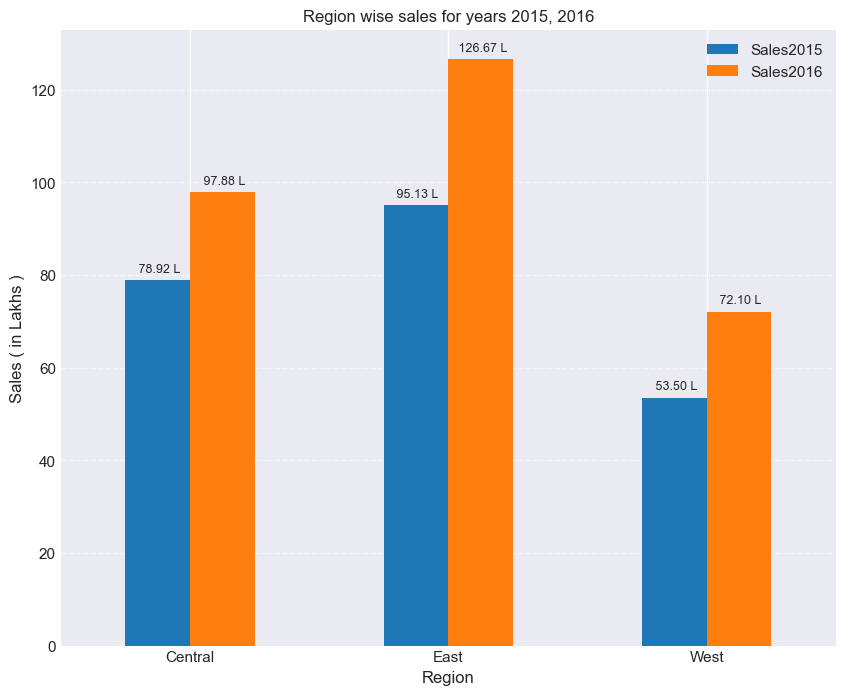

In [285]:
# Visualizing the data using bar plot
regional_sales.plot(kind = 'bar' , rot = 0, figsize = (10,8))

plt.title('Region wise sales for years 2015, 2016')
plt.xlabel('Region')
plt.ylabel('Sales ( in Lakhs )')

plt.grid(axis = 'y' , linestyle = '--', alpha = 0.5)


# Formatting the y-axis labels to display in Lakhs
def to_lakhs(x, pos):
    return f'{int(x / 100000)}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_lakhs))


# To add labels to the bars
ax = plt.gca()

for p in ax.patches:
    ax.annotate( f'{p.get_height()/100000 : .2f} L', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center' ,\
                                    va = 'center', xytext = (0,8), textcoords = 'offset points' , fontsize = 9)

plt.show()

_**Ques 2: Pie charts for sales for each region in 2016**_

In [92]:
region_2016 = sales.groupby('Region')['Sales2016'].sum().round(2)

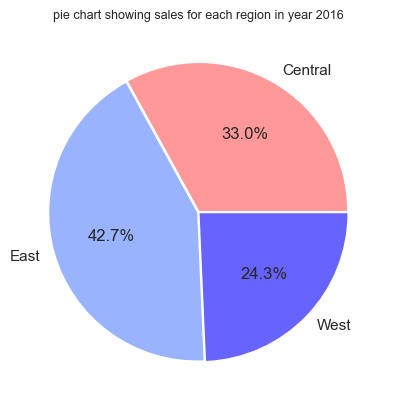

In [280]:
region_2016.plot(kind='pie', autopct = '%1.1f%%' , colors=['#ff9999','#99b3ff','#6663ff'], explode = [0.01, 0.01, 0.01])

plt.title('pie chart showing sales for each region in year 2016', fontsize = 9)
plt.ylabel ('')

plt.show()

_**Ques 3: Compare the total sales of 2015 and 2016 with respect to Region and Tiers**_

In [126]:
region_tier_sales = sales.iloc[:, [2,6,8,9]]

In [138]:
rts = region_tier_sales.groupby(['Region', 'Tier']).agg({'Sales2015':'sum' , 'Sales2016':'sum'}).round(3).reset_index()
rts

,Region,Tier,Sales2015,Sales2016
0,Central,High,4798698.430,6026042.940
1,Central,Low,943439.670,1132832.850
2,Central,Med,2068225.865,2632181.471
3,Central,Out,81364.890,-3248.530
4,East,High,6102946.120,7817151.100
5,East,Low,901665.800,1144929.590
6,East,Med,2470998.020,3705149.760
7,East,Out,37306.550,0.000
8,West,High,2944789.260,3768038.350
9,West,Low,671064.380,1099502.180


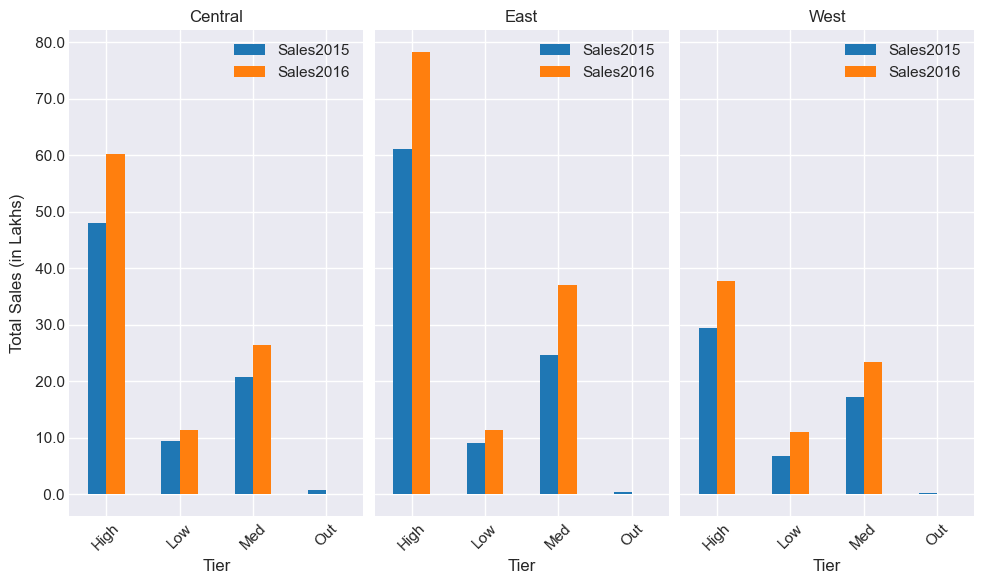

In [279]:
# Defining region-wise dataset

central = rts[rts.Region == 'Central'].set_index('Tier')
east = rts[rts.Region == 'East'].set_index('Tier')
west = rts[rts.Region == 'West'].set_index('Tier')


# Creating subplots for all regions

fig, (ax1, ax2, ax3) = plt.subplots( 1, 3, figsize = (10,6), sharey = True )


# plotting the subplots using bar graphs

central.plot(kind = 'bar', ax=ax1, title = 'Central', ylabel = 'Total Sales (in Lakhs)', rot = 45)
east.plot(kind = 'bar', ax=ax2, title = 'East', rot = 45)
west.plot(kind = 'bar', ax=ax3, title = 'West', rot = 45)


# Formatting the y-axis labels to display in Lakhs

def to_Lakhs(x, pos):
    return f'{(x/100000): .1f}'


plt.gca().yaxis.set_major_formatter(FuncFormatter(to_Lakhs))


plt.tight_layout()
plt.subplots_adjust(wspace=0.04)
plt.show()




_**Ques 4: In East region, which state registered a decline in 2016 as compared to 2015?**_

In [165]:
east_sales = sales[sales.Region == 'East'].loc[:, ['State', 'Sales2015', 'Sales2016']].\
                                                          groupby('State')[['Sales2015', 'Sales2016']].agg('sum')

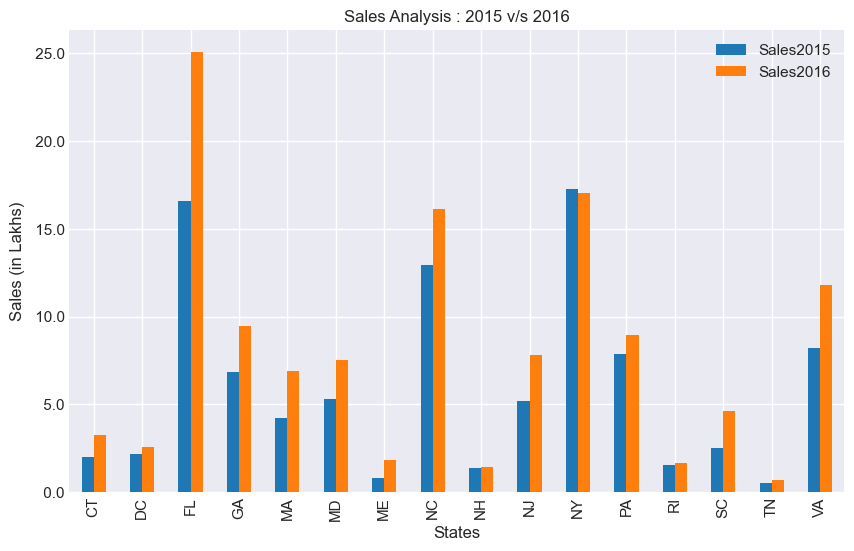

In [278]:
east_sales.plot(kind = 'bar', figsize = (10,6))
plt.title('Sales Analysis : 2015 v/s 2016')
plt.ylabel('Sales (in Lakhs)')
plt.xlabel('States')

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_Lakhs))
plt.show()

_**Ans: State "NY" of the East Region showed a decline of " 1.29% " in 2016 when compared to the sales of 2015**_

_**Ques 5: In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?**_

In [186]:
high_tier_sales = sales[sales.Tier == 'High'].groupby('Division').agg({'Units2015':'sum', 'Units2016': 'sum'})

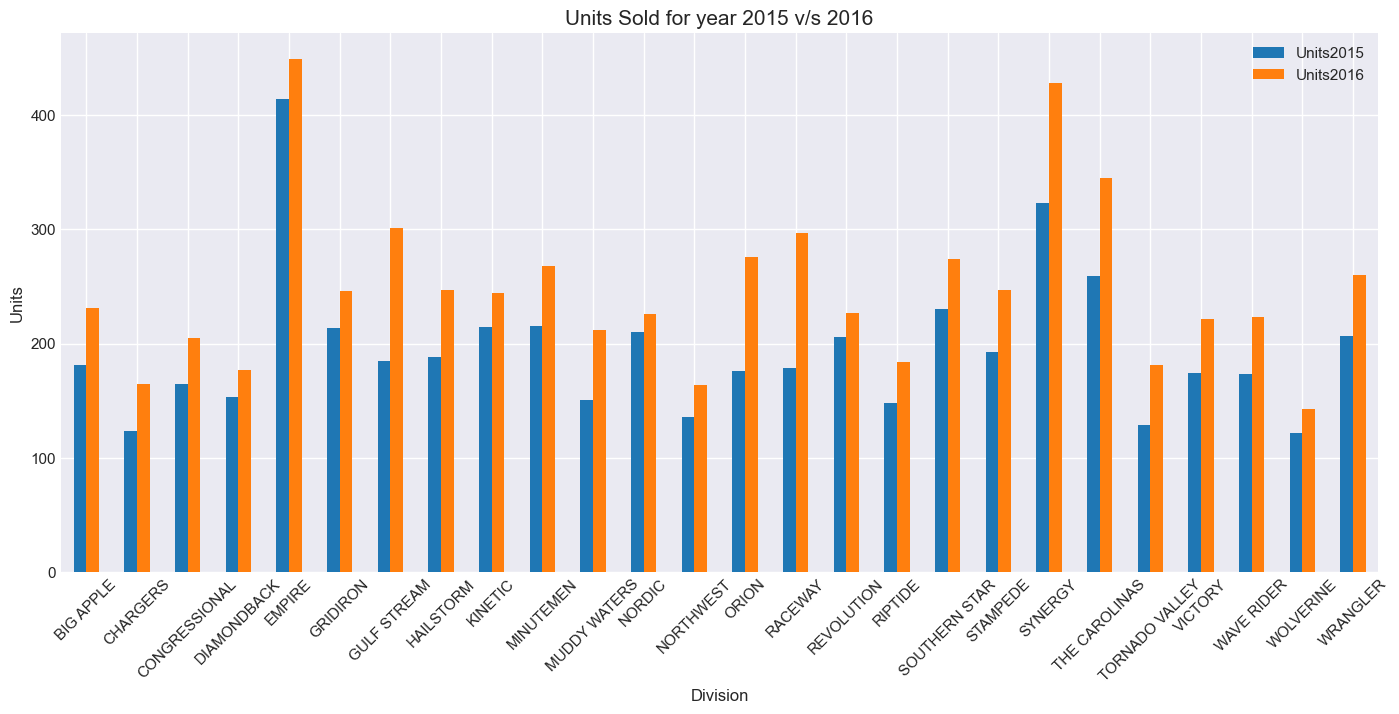

In [277]:
high_tier_sales.plot(kind = 'bar', figsize = (17,7), rot = 45)

plt.title('Units Sold for year 2015 v/s 2016', fontsize = 15)
plt.ylabel('Units')

plt.show()

_**Ans: No Divison showed any decline in units sold for 2016 as compared to 2015**_

_**Ques 6: Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as:**_


                • Jan - Mar : Q1
                • Apr - Jun : Q2
                • Jul - Sep : Q3
                • Oct - Dec : Q4
            


In [216]:
sales.insert(8, 'Qtr', np.where(sales.Month.isin(['Jan', 'Feb', 'Mar']), 'Q1', 
         np.where(sales.Month.isin(['Apr', 'May', 'Jun']), 'Q2', 
                  np.where(sales.Month.isin(['Jul', 'Aug', 'Sep']), 'Q3', 'Q4'))))

sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Qtr,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,Q3,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,Q4,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,Q2,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,Q1,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,Q3,3684.48,0.00,1.0,0.0,1.02,1.53


_**Ques 7: Compare Qtr wise sales in 2015 and 2016 in a bar plot**_


In [219]:
qtr_sales = sales.groupby('Qtr').agg({'Sales2015': 'sum', 'Sales2016': 'sum'}).round(3)

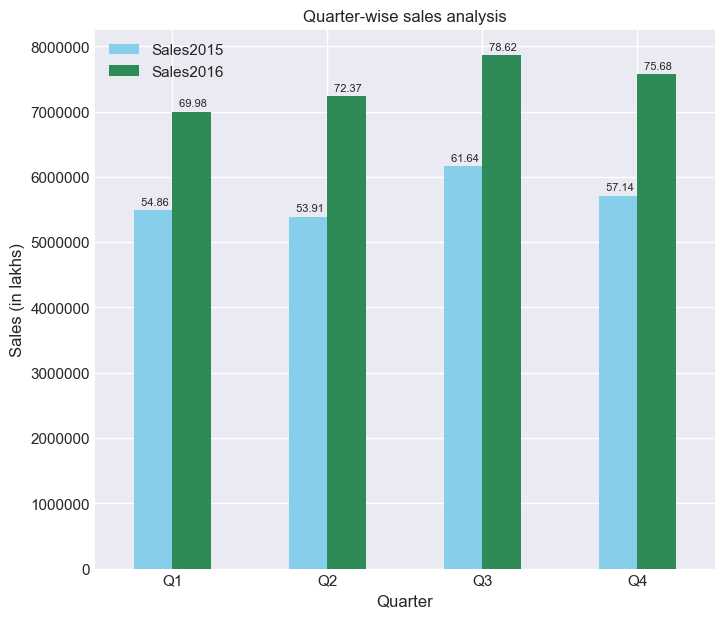

In [276]:
qtr_sales.plot(kind = 'bar', figsize = (8,7), rot = 0 , color = ['skyblue', 'seagreen'])

plt.title('Quarter-wise sales analysis')
plt.xlabel('Quarter')
plt.ylabel('Sales (in lakhs)')
plt.style.use('seaborn-darkgrid')

ax = plt.gca()

for p in ax.patches:   
    ax.annotate( f'{p.get_height()/100000 : .2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center' ,\
                                    va = 'center', xytext = (0,6), textcoords = 'offset points' , fontsize = 8)
def to_absvalue(x, pos):
    return f'{int(x)}'

ax.yaxis.set_major_formatter(FuncFormatter(to_absvalue))
plt.show()

_**Ques 8: Determine the composition of Qtr wise sales in 2016 with regards to all the Tiers in a pie chart.**_
 
_**(Draw 4 pie charts representing a Quarter for each Tier)**_


In [328]:
qtr_tier_sales = pd.pivot_table(index = 'Tier', columns = 'Qtr', values ='Sales2016', data = sales, aggfunc = 'sum').round(3).T
qtr_tier_sales = abs(qtr_tier_sales)
qtr_tier_sales

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.595,948832.77,2181401.879,0.00
Q2,4130952.560,890594.75,2215813.858,0.00
Q3,4872559.250,795177.71,2197057.592,3248.53
Q4,4740001.985,742659.39,2085206.798,0.00


In [324]:
cur_qtr


Tier
High    4872559.250
Low      795177.710
Med     2197057.592
Out       -3248.530
Name: Q3, dtype: float64

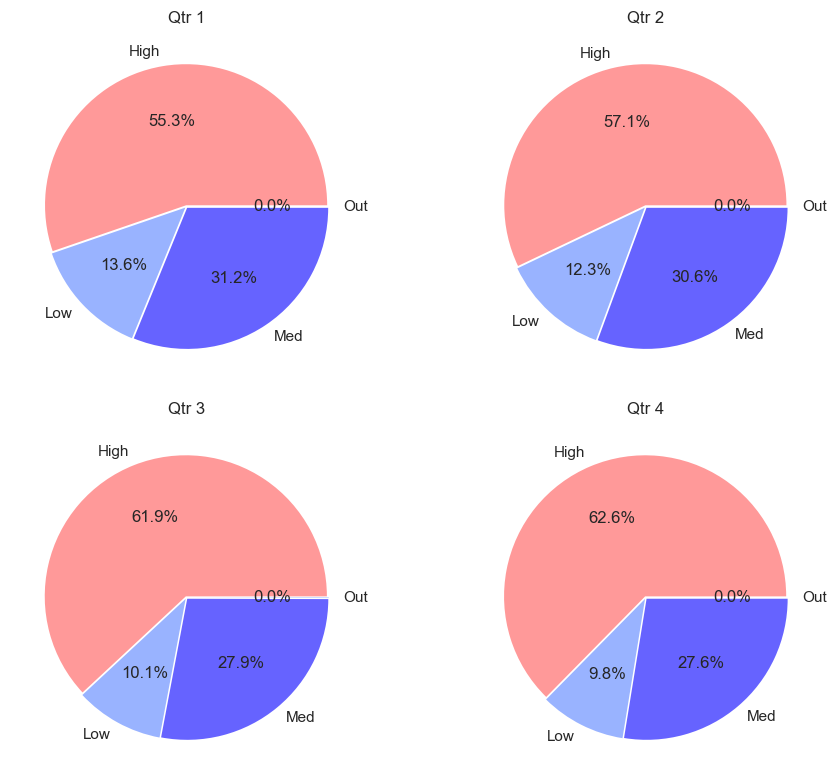

In [337]:
# plotting the pie charts

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,8))

for i , ax in enumerate (axes.flat):
    
    # extracting the data
    cur_qtr = qtr_tier_sales.iloc[i, :]
    
    # plotting multiple pie chart
    ax.pie(cur_qtr,  labels = cur_qtr.index , autopct ='%1.1f%%', colors=['#ff9999','#99b3ff','#6663ff', '#6999ff'], explode = [0.01, 0.01, 0.01, 0.01]) 
    ax.set_title(f'Qtr {i+1}')


plt.tight_layout()
plt.show()